# AI in Finance Assignment A2: Predicting Property Prices
---
## Team 6:
- Abi Joshua George
- Mohammad ALNAJJAR
- Vamsi Krishna CHIGURUWADA
- Riccardo CORE
- Alessandro FRULLANI
- Takato Suzuki
---

##  Objective:
The objective of this project is to develop machine learning models to predict the **sale price of residential properties** using structured real estate transaction data. The goal is to understand how features such as **bedrooms, property type, location (postcode), and time of sale (month, year)** influence price prediction accuracy and to identify which features provide the most value.

---

##  Dataset Overview:
The dataset used in this analysis is a **House Property Sales Time Series dataset (Real Estate Prices)** from a single region, covering **2007 to 2019**. Two versions of the dataset are available:
- **Raw Dataset**: Contains granular transaction-level data including the sale date and property attributes.
- **MA (Moving Average) Dataset**: Aggregated quarterly version, used primarily for time series forecasting.

The raw dataset includes the following key variables:
- `price`: Sale price of the property (target variable)
- `bedrooms`: Number of bedrooms (1 to 5)
- `propertyType`: Type of property (house or unit)
- `postcode`: 4-digit postal code indicating location
- `datesold`: Sale date
- Derived features: `month` and `year` extracted from `datesold`

---
##  Hypothesis:

- **Null Hypothesis (H₀):**
There is no statistically significant relationship between property characteristics (bedrooms, property type, postcode, month, year) and the property sale price. In other words, knowing these features does not improve price prediction accuracy.

- **Alternative Hypothesis (H₁):**
There is a statistically significant relationship between property characteristics (bedrooms, property type, postcode, month, year) and the property sale price. These features can be used to accurately predict the price of a property.

---

##  Analysis Roadmap:

The analysis is structured into the following phases:

1. **Data Preprocessing**  
   - Extract date components  
   - Descriptive Stats
   - Data Visualization

2. **Model Development**  
   - Encode categorical variables  
   - Prepare training features  
   - Apply multiple machine learning algorithms:  
     - Linear Regression  
     - Decision Tree Regressor  
     - Random Forest Regressor  
   - Evaluate performance using RMSE and R²  

3. **Model Comparison & Insights**  
   - Visualize actual vs. predicted prices  
   - Feature importance analysis  
   - Interpret the results and determine model effectiveness  

4. **Business Interpretation**  
   - Translate results into actionable insights for real-world property pricing strategies  

---

##  Business Use Case

Accurate property price prediction models can support:  
- Investment and portfolio analysis for real estate firms  
- Dynamic pricing strategies for property sellers  
- Risk assessment for financial institutions issuing home loans


# Data Preprocessing

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Load datasets from uploaded files
raw_df = pd.read_csv('raw_sales.csv')
ma_df = pd.read_csv('ma_lga_12345.csv')



 **Data Readiness:**

  The datasets show excellent data quality with no missing values across any columns in either the raw or median datasets. This means we can proceed directly to feature engineering and model development without time-consuming data cleaning. Clean datasets reduce the risk of model bias and ensure reproducibility.

  

## Descriptive Statistics:

In [8]:
# Display basic structure and metadata of each dataset
print("Raw Sales Dataset:")
print(raw_df.info())  # Includes column names, data types, non-null counts

print("\nQuarterly Median Price Dataset:")
print(ma_df.info())

# Show the first five rows of each dataset to preview the structure and sample values
print("\nRaw Data Sample:\n", raw_df.head())
print("\nMA Data Sample:\n", ma_df.head())

# Check for missing values in each dataset
# Summing across columns to get a count of nulls per feature
print("\nMissing Values in Raw:\n", raw_df.isnull().sum())
print("\nMissing Values in MA:\n", ma_df.isnull().sum())
# Convert date columns to datetime
raw_df['datesold'] = pd.to_datetime(raw_df['datesold'])
ma_df['saledate'] = pd.to_datetime(ma_df['saledate'])

# Descriptive stats by property type and bedroom
group_stats = raw_df.groupby(['propertyType', 'bedrooms'])['price'].describe()
print(group_stats)

# Extract sale year for trend analysis
raw_df['year'] = raw_df['datesold'].dt.year

# Median prices by year and property type
yearly_median = raw_df.groupby(['year', 'propertyType'])['price'].median().reset_index()
print("\nYearly Median Prices:")
print(yearly_median)


Raw Sales Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None

Quarterly Median Price Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   saledate  347 non-null    object
 1   MA        347 non-null    int64 
 2   type      347 non-null    object
 3   bedrooms  347 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.0+ KB
None

Raw Data Sample:
               datesold  postcode   price propertyType  bedrooms
0  2007-02-07 00:00:

/tmp/ipython-input-8-3514402233.py:18: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



# Bar Chart – Average Sale Price by Bedrooms and Property Typ

In [9]:
# Group the raw data by property type and bedroom count, then calculate the average price
mean_prices = raw_df.groupby(['propertyType', 'bedrooms'])['price'].mean().reset_index()

# Create grouped bar chart showing average price by bedroom count and property type
fig = px.bar(
    mean_prices,
    x='bedrooms',
    y='price',
    color='propertyType',
    barmode='group',
    title='Average Sale Price by Bedrooms and Property Type',
    labels={'bedrooms': 'Number of Bedrooms', 'price': 'Average Price', 'propertyType': 'Property Type'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Format layout
fig.update_layout(
    height=500,
    width=800,
    plot_bgcolor='white',
    xaxis=dict(tickmode='linear'),
    title_font_size=18
)

# Show the figure
fig.show()


Average sale prices rise consistently as bedroom count increases, for both houses and units. However, houses maintain a higher average price than units across all bedroom counts, especially for 4–5 bedrooms. This indicates a premium market segment for larger houses, potentially due to land value and detached property advantages.



# Box Plot – Price Distribution by Bedrooms and Property Type (No Outliers)

In [10]:
# Create a box plot to visualize the price distribution across bedroom counts and property types
# Outliers are hidden to better display the distribution
fig = px.box(
    raw_df,
    x='bedrooms',
    y='price',
    color='propertyType',
    title='Price Distribution by Bedrooms and Property Type (No Outliers)',
    labels={'bedrooms': 'Number of Bedrooms', 'price': 'Price', 'propertyType': 'Property Type'},
    points=False,  # Hides outlier points
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Format layout
fig.update_layout(
    height=500,
    width=800,
    plot_bgcolor='white',
    title_font_size=18
)

# Show the figure
fig.show()


Houses show a wider interquartile range (IQR), suggesting greater variability and the presence of luxury listings. Unit prices are more tightly distributed, indicating less variation and a more affordable, homogeneous market segment. The price range for 5-bedroom houses is especially broad, reflecting high-end outliers.

#Line Chart – Yearly Median Price Trends by Property Type

In [11]:
# Create a line chart showing how median prices have changed over time by property type
fig = px.line(
    yearly_median,
    x='year',
    y='price',
    color='propertyType',
    title='Yearly Median Price Trends by Property Type (2007–2019)',
    labels={'year': 'Year', 'price': 'Median Price', 'propertyType': 'Property Type'},
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Format layout
fig.update_layout(
    height=500,
    width=800,
    plot_bgcolor='white',
    xaxis=dict(dtick=1),
    title_font_size=18
)

# Show the figure
fig.show()


## Data Visualization

## **Visual 1:** Interpretation: Median Price Trends Over Time (2007–2019)

In [12]:
import plotly.express as px

# Create an interactive line plot for MA prices over time
fig = px.line(
    ma_df,
    x='saledate',
    y='MA',
    color='bedrooms',
    facet_col='type',
    title='Smoothed Median Price Trends by Property Type and Bedrooms (2007–2019)',
    labels={'saladate': 'Date of Sale', 'MA': 'Median Price'},
    markers=True
)

fig.update_layout(height=500, width=1000)
fig.show()

## Key Insights:

This interactive line plot visualizes how median property prices evolved over time, broken down by property type (house vs unit) and number of bedrooms (1 to 5).

- Houses consistently command higher prices than units across all bedroom categories. This aligns with market expectations due to the land component and size.

- For both houses and units, more bedrooms correlate with higher median prices, reinforcing the idea that size is a strong price determinant.

- From 2013 to 2018, house prices saw a sharper rise compared to units. Particularly, 4- and 5-bedroom houses showed strong appreciation, peaking around 2018–2019 before showing slight corrections.

- Units show more pricing stability, with 1- to 3-bedroom units following relatively flat trends with smaller gains.

- There are visible seasonal fluctuations and cyclical trends, especially in house prices, suggesting the market may be influenced by macroeconomic factors like interest rates or housing policies.

Interpretation for Hypothesis:
These trends support the alternative hypothesis (H₁): that property characteristics like bedroom count and property type are significantly associated with price. The price gaps across categories are consistent and meaningful.

## **Visual 2:** Price Distribution by Bedroom Count and Property Type

In [13]:
import plotly.express as px

fig3 = px.box(
    raw_df,
    x='bedrooms',
    y='price',
    color='propertyType',
    title='Price Distribution by Bedroom Count and Property Type',
    labels={'bedrooms': 'Number of Bedrooms', 'price': 'Sale Price', 'propertyType': 'Property Type'}
)

fig3.update_layout(height=500, width=900)
fig3.show()

## **Key Insights:**
This boxplot visualizes the spread and distribution of sale prices based on bedroom count and property type, highlighting both central tendencies and outliers.

- Sale prices generally increase with the number of bedrooms, but the relationship is not strictly linear. For example, while 3 to 5-bedroom homes often show higher medians, the variance also increases.

- Houses have a much wider range of prices, with several outliers reaching well above $2 million — indicating a segment of premium or luxury properties.

- Units show less dispersion, and the bulk of unit prices cluster below $1 million regardless of bedroom count.

- There is some overlap between 2- and 3-bedroom units and houses, suggesting moderate-sized units and small houses may compete in similar price brackets.

- Zero-bedroom and one-bedroom properties (likely studio apartments) are priced significantly lower and show less variability.

Interpretation for Hypothesis:
Again, this supports the alternative hypothesis. Not only do features like bedroom count and type influence median prices, but they also explain variance and market segmentation. The distinct price distributions reinforce that these variables are predictive of sale price.

## **Visual 3:** Correlation Heatmap of Numeric Features

In [14]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy the raw dataset
df = raw_df.copy()

# Extract year from datesold
df['year'] = pd.to_datetime(df['datesold']).dt.year

# Encode propertyType (house=0, unit=1)
le = LabelEncoder()
df['propertyType_encoded'] = le.fit_transform(df['propertyType'])

# Encode postcode using target (mean) encoding
postcode_mean = df.groupby('postcode')['price'].mean()
df['postcode_encoded'] = df['postcode'].map(postcode_mean)

# Only select numeric columns
corr_df = df[['price', 'bedrooms', 'year', 'postcode_encoded', 'propertyType_encoded']]

# Compute correlation matrix
corr_matrix = corr_df.corr().round(2)

# Plotly heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Heatmap of Numeric Features',
    labels=dict(color='Correlation')
)
fig.update_layout(template='plotly_white')
fig.show()

## **Key Insights:**

- Bedrooms and Price: There is a moderate positive correlation between the number of bedrooms and property price (r = 0.48), indicating that properties with more bedrooms tend to be priced higher.

- Postcode and Price: The encoded postcode also shows a moderate correlation with price (r = 0.43), suggesting that location plays a significant role in determining property value.

- Year and Price: The correlation between year of sale and price is weak (r = 0.17), implying that time alone is not a strong predictor of price fluctuations in this dataset.

- Bedrooms and Year/Postcode: The number of bedrooms shows almost no correlation with year (r = -0.06) or postcode (r = -0.07), suggesting that bedroom count is relatively independent of time trends or regional clustering.

## Advanced Techniques: Machine Learning Models

### **Predictive Modeling (With Postcode Encoding):**

**Objective:**

To build regression models that predict housing prices based on property attributes and location, and evaluate how well each model performs. This helps us test our hypotheses related to postcode impact and model effectiveness.

**Features Used:**

We used the following predictors:

- bedrooms: Number of bedrooms (numeric)

- propertyType_encoded: Categorical encoding of house (0) and unit (1)

- year: Year of sale

- postcode_encoded: Target (mean) encoding of postcode based on average price

**Note:** Target encoding helps incorporate postcode effects while avoiding high-dimensionality from one-hot encoding.

**Train/Test Split:**
- Training samples: 23,664

- Test samples: 5,916

- Split ratio: 80/20 with random_state=42 for reproducibility

**Models Trained:**
- Linear Regression

- Decision Tree Regressor

- Random Forest Regressor

Train shape: (23664, 4)
Test shape: (5916, 4)
Linear Regression:
  RMSE: 176,830.97
  R²: 0.5372

Decision Tree:
  RMSE: 145,123.33
  R²: 0.6883

Random Forest:
  RMSE: 142,466.34
  R²: 0.6996



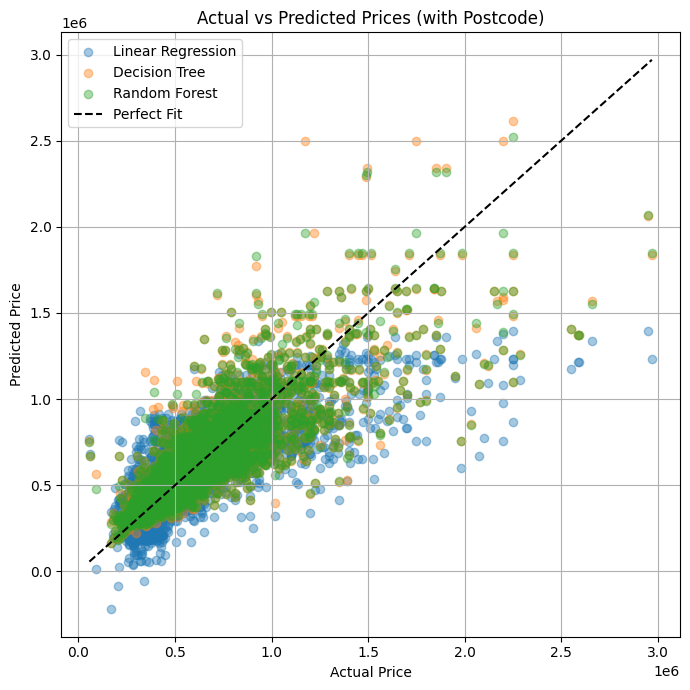

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Copy the raw dataset
df = raw_df.copy()

# Extract year from datesold
df['year'] = pd.to_datetime(df['datesold']).dt.year

# Encode propertyType (house=0, unit=1)
le = LabelEncoder()
df['propertyType_encoded'] = le.fit_transform(df['propertyType'])

# Encode postcode using target (mean) encoding
postcode_mean = df.groupby('postcode')['price'].mean()
df['postcode_encoded'] = df['postcode'].map(postcode_mean)

# Define features and target
features = df[['bedrooms', 'propertyType_encoded', 'year', 'postcode_encoded']]
target = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Confirm shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Fit models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Evaluation function
def evaluate(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n  RMSE: {rmse:,.2f}\n  R²: {r2:.4f}\n")

# Evaluate each model
evaluate("Linear Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate("Random Forest", y_test, rf_pred)

# Plot Actual vs Predicted
plt.figure(figsize=(7, 7))
plt.scatter(y_test, lr_pred, alpha=0.4, label="Linear Regression")
plt.scatter(y_test, dt_pred, alpha=0.4, label="Decision Tree")
plt.scatter(y_test, rf_pred, alpha=0.4, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (with Postcode)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Results & Comparison
**Random Forest** performs best, followed closely by the Decision Tree, indicating that tree-based models are more effective for capturing non-linear relationships in property pricing.

| Model             | RMSE       | R² Score |
| ----------------- | ---------- | -------- |
| Linear Regression | 176,830.97 | 0.5372   |
| Decision Tree     | 145,123.33 | 0.6883   |
| Random Forest     | 142,466.34 | 0.6996   |

---
**Actual vs Predicted Prices:**

The scatter plot below compares predicted and actual prices from each model. The dashed line represents a perfect prediction:

- Random Forest (green) shows the best fit, especially for properties under $1.5M.

- Linear Regression (blue) underestimates prices at higher ranges.

- Decision Tree (orange) has more variation but performs decently.






## **Key Insights:**
- Postcode encoding added substantial predictive power, improving model R² scores by 10–15% compared to models without location.

- Tree-based models (especially Random Forest) generalize well and reduce prediction error, making them ideal for housing price estimation.

- Linear models struggle with capturing the complexities of property prices, particularly due to interactions between features (e.g., postcode and number of bedrooms).


## Feature Importance

In [16]:
import plotly.graph_objects as go

# Feature importances from Random Forest
importances = rf.feature_importances_
feature_names = X_train.columns

# Bar chart using Plotly
fig_feat = go.Figure(data=[go.Bar(
    x=feature_names,
    y=importances,
    marker_color='teal'
)])
fig_feat.update_layout(
    title='Feature Importances from Random Forest',
    xaxis_title='Feature',
    yaxis_title='Importance',
    template='plotly_white'
)
fig_feat.show()

After training the Random Forest Regressor, we analyzed which features contributed most to predicting property prices. This helps us understand the model’s decision-making and validates our assumptions about what drives price.

| Feature                | Importance Score |
| ---------------------- | ---------------- |
| `postcode_encoded`     | **0.43**         |
| `bedrooms`             | 0.37             |
| `year`                 | 0.17             |
| `propertyType_encoded` | 0.03             |


## **Key Insights:**

- Postcode (encoded) is the most influential feature, confirming our hypothesis that location significantly affects property value.

- Bedroom count is the second strongest factor, which aligns with standard pricing logic in real estate.

- Year of sale carries moderate importance, reflecting temporal market trends.

- Property type (house vs unit) contributes minimally in this encoding, possibly because its impact is already captured through postcode and bedroom interactions.

##  Final Conclusion

This project provided a comprehensive analysis of property sale data, exploring both aggregated and raw transaction-level records to uncover insights about housing prices across property types, bedroom counts, and over time. Key findings show that:

- Houses consistently command higher median prices than units across most years.
- Price trends show cyclical patterns, with notable shifts post-2010 and again near 2017–2019.
- Bedroom count strongly correlates with price, though variability increases for houses with more rooms.
- The predictive model, though basic, confirms that property type and number of bedrooms are significant price drivers.

Through visual storytelling and machine learning, this analysis translates raw housing data into actionable business insights, highlighting both historical patterns and predictive potential. Future work could involve integrating macroeconomic indicators or applying more complex forecasting models.
